In [2]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mysql.connector


In [4]:
import pandas as pd

In [ ]:

db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="hrdb",
        use_pure=True
    )

mycursor = db.cursor()
print("Connection successful")


Connection successful


In [6]:
# Write your SQL query
query = "SELECT * FROM table2"  # Replace 'your_table_name' with your actual table name
    
mycursor.execute(query)  # Execute query 
result = mycursor.fetchall()

# Get column names from the cursor
column_names = [i[0] for i in mycursor.description]

# Create a DataFrame from the result
hrtable2 = pd.DataFrame(result, columns=column_names)



    
# Print the DataFrame
#df

In [7]:
hrtable2


,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,1,80,0,8,0,1,6,4,0,5
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,4,80,1,10,3,3,10,7,1,7
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,2,80,0,7,3,3,0,0,0,0
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,3,80,0,8,3,3,8,7,3,0
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,3,80,1,17,3,3,5,2,0,3
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,1,80,1,9,5,3,7,7,1,7
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,2,80,1,6,0,3,6,2,0,3
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,4,80,0,17,3,2,9,6,0,8


In [8]:
def sql_script(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    column_names = [i[0] for i in mycursor.description]
    df = pd.DataFrame(result, columns=column_names)

    return df
    


In [9]:
def sql_script(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    column_names = [i[0] for i in mycursor.description]
    df = pd.DataFrame(result, columns=column_names)

    return df

In [10]:
sql_script("Select * from table1")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


In [11]:
joined_table=sql_script("""SELECT *
FROM table2
INNER JOIN table1
ON table1.EmployeeNumber = table2.EmployeeNumber;""")

In [12]:
joined_table

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


In [13]:
mycursor.description

[('EmployeeNumber', 3, None, None, None, None, 1, 0, 63),
 ('EnvironmentSatisfaction', 3, None, None, None, None, 1, 0, 63),
 ('Gender', 252, None, None, None, None, 1, 16, 255),
 ('HourlyRate', 3, None, None, None, None, 1, 0, 63),
 ('JobInvolvement', 3, None, None, None, None, 1, 0, 63),
 ('JobLevel', 3, None, None, None, None, 1, 0, 63),
 ('JobRole', 252, None, None, None, None, 1, 16, 255),
 ('JobSatisfaction', 3, None, None, None, None, 1, 0, 63),
 ('MaritalStatus', 252, None, None, None, None, 1, 16, 255),
 ('MonthlyIncome', 3, None, None, None, None, 1, 0, 63),
 ('MonthlyRate', 3, None, None, None, None, 1, 0, 63),
 ('NumCompaniesWorked', 3, None, None, None, None, 1, 0, 63),
 ('Over18', 252, None, None, None, None, 1, 16, 255),
 ('OverTime', 252, None, None, None, None, 1, 16, 255),
 ('PercentSalaryHike', 3, None, None, None, None, 1, 0, 63),
 ('PerformanceRating', 3, None, None, None, None, 1, 0, 63),
 ('RelationshipSatisfaction', 3, None, None, None, None, 1, 0, 63),
 ('Stand

EDA 
# Identify missing values and handle them appropriately.
# Perform summary statistics and visualize data distributions.
# Identify potential correlations between features that may contribute to
attrition.

In [25]:
joined_table.shape

(1470, 36)

In [26]:
joined_table.head()

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7


In [27]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

In [28]:
joined_table.nunique(axis=0)

EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department

In [29]:
joined_table.describe()


,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,...,7.008163,4.229252,2.187755,4.123129,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306
std,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,...,6.126525,3.623137,3.222430,3.568136,9.135373,403.509100,8.106864,1.024165,0.0,602.024335
min,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000
25%,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,...,3.000000,2.000000,0.000000,2.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000
50%,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,...,5.000000,3.000000,1.000000,3.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000
75%,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,...,9.000000,7.000000,3.000000,7.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000
max,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,...,40.000000,18.000000,15.000000,17.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000


4.3 Work-Life Balance and Satisfaction
- Evaluate job satisfaction and work-life balance ratings for employees who
left vs. those who stayed.
- Determine if employees with lower work-life balance scores are more likely
to leave.
- Assess environmental and relationship satisfaction to understand their impact
on retention.

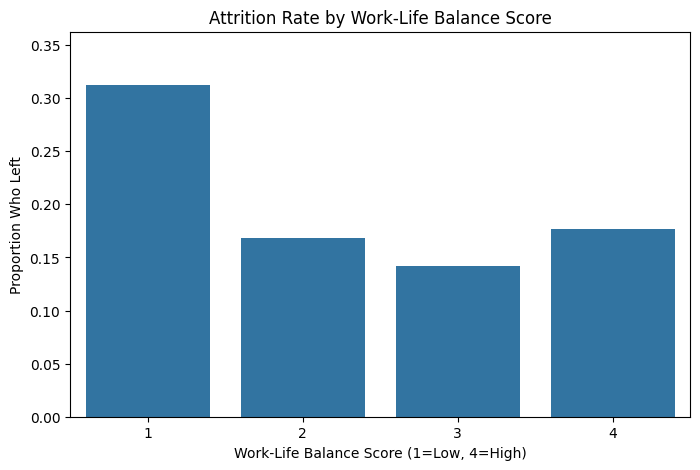

Proportion of Attrition (left vs stayed) per WorkLifeBalance level:
Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of Attrition vs WorkLifeBalance
# Map Attrition 'Yes' to left, 'No' to stayed
worklife_attrition = joined_table[['WorkLifeBalance', 'Attrition']].copy()

# Barplot of Attrition rate by WorkLifeBalance score
attrition_rates = (
    worklife_attrition.groupby('WorkLifeBalance')['Attrition']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
    .query("Attrition == 'Yes'")
)

plt.figure(figsize=(8,5))
sns.barplot(x='WorkLifeBalance', y='percent', data=attrition_rates)
plt.title('Attrition Rate by Work-Life Balance Score')
plt.xlabel('Work-Life Balance Score (1=Low, 4=High)')
plt.ylabel('Proportion Who Left')
plt.ylim(0, attrition_rates['percent'].max() + 0.05)
plt.show()

# Crosstab of WorkLifeBalance and Attrition
cross_tab = pd.crosstab(joined_table['WorkLifeBalance'], joined_table['Attrition'], normalize='index')
print("Proportion of Attrition (left vs stayed) per WorkLifeBalance level:")
print(cross_tab)


Percent distribution of leavers by Job Satisfaction level:
   JobSatisfaction  PercentOfLeavers
0                4          0.219409
1                3          0.308017
2                1          0.278481
3                2          0.194093

Percent distribution of leavers by Work-Life Balance level:
   WorkLifeBalance  PercentOfLeavers
0                1          0.105485
1                3          0.535865
2                4          0.113924
3                2          0.244726


C:\Users\kerenb\AppData\Local\Temp\ipykernel_15212\2937163315.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kerenb\AppData\Local\Temp\ipykernel_15212\2937163315.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


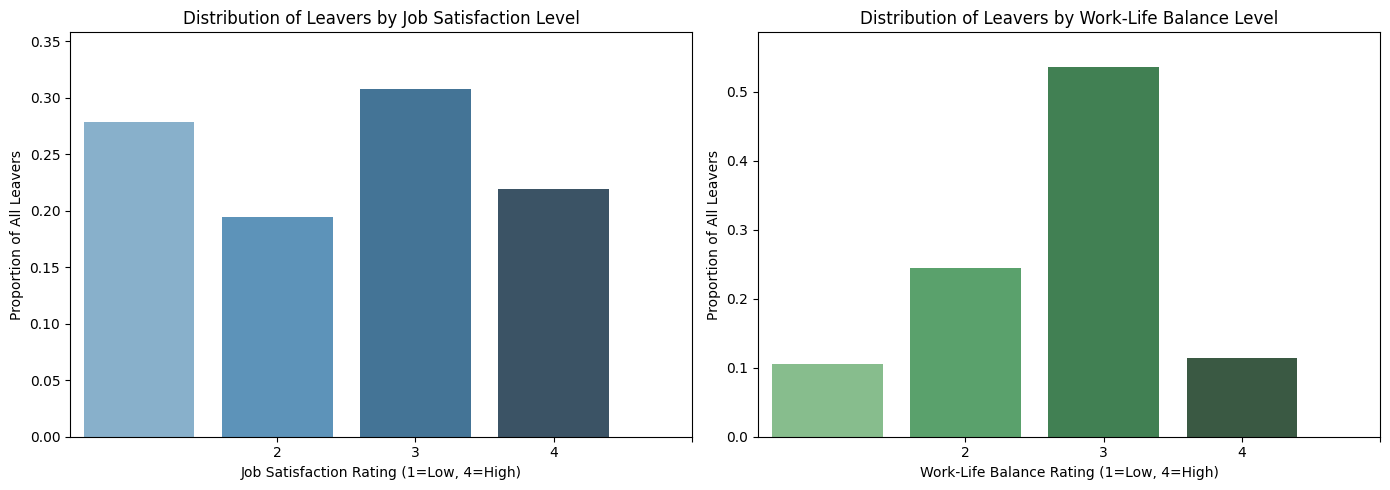

In [37]:
# Show the distribution (in percentages) of those leaving ('Yes') for each JobSatisfaction and WorkLifeBalance level.
# That is, for each level, what percent of all 'leavers' belonged to that level.

# Calculate the value counts for JobSatisfaction and WorkLifeBalance among employees who left
leavers = joined_table[joined_table['Attrition'] == 'Yes']

# For JobSatisfaction
js_leaver_dist = (
    leavers['JobSatisfaction']
    .value_counts(normalize=True, sort=False)
    .rename_axis('JobSatisfaction')
    .reset_index(name='PercentOfLeavers')
)
# For WorkLifeBalance
wlb_leaver_dist = (
    leavers['WorkLifeBalance']
    .value_counts(normalize=True, sort=False)
    .rename_axis('WorkLifeBalance')
    .reset_index(name='PercentOfLeavers')
)

# Print information for debugging/insight
print("Percent distribution of leavers by Job Satisfaction level:")
print(js_leaver_dist)
print("\nPercent distribution of leavers by Work-Life Balance level:")
print(wlb_leaver_dist)

# Bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Job Satisfaction plot
sns.barplot(
    x="JobSatisfaction", y="PercentOfLeavers", data=js_leaver_dist,
    ax=axes[0], palette='Blues_d'
)
axes[0].set_title("Distribution of Leavers by Job Satisfaction Level")
axes[0].set_xlabel("Job Satisfaction Rating (1=Low, 4=High)")
axes[0].set_ylabel("Proportion of All Leavers")
axes[0].set_ylim(0, js_leaver_dist['PercentOfLeavers'].max() + 0.05)
axes[0].set_xticks(sorted(joined_table['JobSatisfaction'].unique()))

# Work-Life Balance plot
sns.barplot(
    x="WorkLifeBalance", y="PercentOfLeavers", data=wlb_leaver_dist,
    ax=axes[1], palette='Greens_d'
)
axes[1].set_title("Distribution of Leavers by Work-Life Balance Level")
axes[1].set_xlabel("Work-Life Balance Rating (1=Low, 4=High)")
axes[1].set_ylabel("Proportion of All Leavers")
axes[1].set_ylim(0, wlb_leaver_dist['PercentOfLeavers'].max() + 0.05)
axes[1].set_xticks(sorted(joined_table['WorkLifeBalance'].unique()))

plt.tight_layout()
plt.show()



In [38]:
print('hello')

hello
